<a id="Importing"></a>
<h1 style='background:#F5F5DC;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center>Importing Important Libraries</center></h1>  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.svm import SVC

# Additional imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score , confusion_matrix , classification_report
from sklearn.model_selection import GridSearchCV, cross_validate
import plotly.express as px

import warnings
warnings.simplefilter(action='ignore')

<a id="Data_Overview"></a>
<h1 style='background:#F5F5DC;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center>Data Overview</center></h1>

In [2]:
# Step 1: Data Loading and Understanding
start_all=time.time()
df = pd.read_excel('/kaggle/input/ecommerce-customer-churn-analysis-and-prediction/E Commerce Dataset.xlsx', sheet_name='E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [3]:
df.shape

(5630, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [5]:
df.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

In [6]:
# colums to list
columns = df.columns.to_list()
columns

['CustomerID',
 'Churn',
 'Tenure',
 'PreferredLoginDevice',
 'CityTier',
 'WarehouseToHome',
 'PreferredPaymentMode',
 'Gender',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'PreferedOrderCat',
 'SatisfactionScore',
 'MaritalStatus',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [7]:
df.select_dtypes(exclude=np.number).columns

Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')

In [8]:
df.describe(include='O').style.background_gradient(axis=None , cmap = "Blues" , vmin = 0 , vmax = 9000  )


,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


In [9]:
# Show the unique values on each column.
for col in df.columns:
    if df[col].dtype == object:
        print(str(col) + ' : ' + str(df[col].unique()))
        print(df[col].value_counts())
        print("________________________________________________________________________________")

PreferredLoginDevice : ['Mobile Phone' 'Phone' 'Computer']
PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64
________________________________________________________________________________
PreferredPaymentMode : ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64
________________________________________________________________________________
Gender : ['Female' 'Male']
Gender
Male      3384
Female    2246
Name: count, dtype: int64
________________________________________________________________________________
PreferedOrderCat : ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion    

In [10]:
df.select_dtypes(include=np.number).columns

Index(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [11]:
df.describe().T.style.bar(subset=['mean']).background_gradient(subset=['std','50%','max'])

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.000000,52815.500000,1625.385339,50001.000000,51408.250000,52815.500000,54222.750000,55630.000000
Churn,5630.000000,0.168384,0.374240,0.000000,0.000000,0.000000,0.000000,1.000000
Tenure,5366.000000,10.189899,8.557241,0.000000,2.000000,9.000000,16.000000,61.000000
CityTier,5630.000000,1.654707,0.915389,1.000000,1.000000,1.000000,3.000000,3.000000
WarehouseToHome,5379.000000,15.639896,8.531475,5.000000,9.000000,14.000000,20.000000,127.000000
HourSpendOnApp,5375.000000,2.931535,0.721926,0.000000,2.000000,3.000000,3.000000,5.000000
NumberOfDeviceRegistered,5630.000000,3.688988,1.023999,1.000000,3.000000,4.000000,4.000000,6.000000
SatisfactionScore,5630.000000,3.066785,1.380194,1.000000,2.000000,3.000000,4.000000,5.000000
NumberOfAddress,5630.000000,4.214032,2.583586,1.000000,2.000000,3.000000,6.000000,22.000000
Complain,5630.000000,0.284902,0.451408,0.000000,0.000000,0.000000,1.000000,1.000000


In [12]:
for col in df.columns:
    if df[col].dtype == float or df[col].dtype == int:
        print(str(col) + ' : ' + str(df[col].unique()))
        print(df[col].value_counts())
        print("________________________________________________________________________________")

CustomerID : [50001 50002 50003 ... 55628 55629 55630]
CustomerID
50001    1
53751    1
53759    1
53758    1
53757    1
        ..
51876    1
51875    1
51874    1
51873    1
55630    1
Name: count, Length: 5630, dtype: int64
________________________________________________________________________________
Churn : [1 0]
Churn
0    4682
1     948
Name: count, dtype: int64
________________________________________________________________________________
Tenure : [ 4. nan  0. 13. 11.  9. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.
  6. 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51.
 61.]
Tenure
1.0     690
0.0     508
8.0     263
9.0     247
7.0     221
10.0    213
5.0     204
4.0     203
3.0     195
11.0    194
6.0     183
12.0    182
13.0    181
14.0    176
2.0     167
15.0    159
16.0    149
19.0    140
18.0    123
20.0    109
17.0    106
23.0     89
21.0     84
22.0     76
24.0     75
28.0     70
30.0     66
27.0     66
26.0     60
25.0     59
29.0     55
31.0 

In [13]:
#As mobile phone and phone are both same so we have merged them
df.loc[df['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice' ] = 'Mobile Phone'
df.loc[df['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'

In [14]:
df['PreferredLoginDevice'].value_counts()

PreferredLoginDevice
Mobile Phone    3996
Computer        1634
Name: count, dtype: int64

In [15]:
#as cod is also cash on delievery
#as cc is also credit card so i merged them
df.loc[df['PreferredPaymentMode'] == 'COD', 'PreferredPaymentMode' ] = 'Cash on Delivery'   # uses loc function
df.loc[df['PreferredPaymentMode'] == 'CC', 'PreferredPaymentMode' ] = 'Credit Card'

In [16]:
df['PreferredPaymentMode'].value_counts()

PreferredPaymentMode
Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: count, dtype: int64

In [17]:
# convert num_cols to categories
df2 = df.copy()
for col in df2.columns:
  if col == 'CustomerID':
    continue

  else:
    if df2[col].dtype == 'int':
      df2[col] = df[col].astype(str)

df2.dtypes

CustomerID                       int64
Churn                           object
Tenure                         float64
PreferredLoginDevice            object
CityTier                        object
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered        object
PreferedOrderCat                object
SatisfactionScore               object
MaritalStatus                   object
NumberOfAddress                 object
Complain                        object
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [18]:
# Categorical cols after Converting
df2.describe(include='O').style.background_gradient(axis=None , cmap = "Blues" , vmin = 0 , vmax = 9000  )

,Churn,PreferredLoginDevice,CityTier,PreferredPaymentMode,Gender,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain
count,5630,5630,5630,5630,5630,5630,5630,5630,5630,5630,5630
unique,2,2,3,5,2,6,5,5,3,15,2
top,0,Mobile Phone,1,Debit Card,Male,4,Mobile Phone,3,Married,2,0
freq,4682,3996,3666,2314,3384,2377,2080,1698,2986,1369,4026


In [19]:
# Numerical cols after Converting
df2.describe().T.style.bar(subset=['mean']).background_gradient(subset=['std','50%','max'])

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.000000,52815.500000,1625.385339,50001.000000,51408.250000,52815.500000,54222.750000,55630.000000
Tenure,5366.000000,10.189899,8.557241,0.000000,2.000000,9.000000,16.000000,61.000000
WarehouseToHome,5379.000000,15.639896,8.531475,5.000000,9.000000,14.000000,20.000000,127.000000
HourSpendOnApp,5375.000000,2.931535,0.721926,0.000000,2.000000,3.000000,3.000000,5.000000
OrderAmountHikeFromlastYear,5365.000000,15.707922,3.675485,11.000000,13.000000,15.000000,18.000000,26.000000
CouponUsed,5374.000000,1.751023,1.894621,0.000000,1.000000,1.000000,2.000000,16.000000
OrderCount,5372.000000,3.008004,2.939680,1.000000,1.000000,2.000000,3.000000,16.000000
DaySinceLastOrder,5323.000000,4.543491,3.654433,0.000000,2.000000,3.000000,7.000000,46.000000
CashbackAmount,5630.000000,177.223030,49.207036,0.000000,145.770000,163.280000,196.392500,324.990000


In [20]:
df.duplicated().sum()

0

In [21]:
# the sum of null values
grouped_data = []
for col in columns:
    n_missing = df[col].isnull().sum()
    percentage = n_missing / df.shape[0] * 100
    grouped_data.append([col, n_missing, percentage])

# Create a new DataFrame from the grouped data
grouped_df = pd.DataFrame(grouped_data, columns=['column', 'n_missing', 'percentage'])

# Group by 'col', 'n_missing', and 'percentage'
result = grouped_df.groupby(['column', 'n_missing', 'percentage']).size()
result

column                       n_missing  percentage
CashbackAmount               0          0.000000      1
Churn                        0          0.000000      1
CityTier                     0          0.000000      1
Complain                     0          0.000000      1
CouponUsed                   256        4.547069      1
CustomerID                   0          0.000000      1
DaySinceLastOrder            307        5.452931      1
Gender                       0          0.000000      1
HourSpendOnApp               255        4.529307      1
MaritalStatus                0          0.000000      1
NumberOfAddress              0          0.000000      1
NumberOfDeviceRegistered     0          0.000000      1
OrderAmountHikeFromlastYear  265        4.706927      1
OrderCount                   258        4.582593      1
PreferedOrderCat             0          0.000000      1
PreferredLoginDevice         0          0.000000      1
PreferredPaymentMode         0          0.000000     

In [22]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
binary_cat_cols = ['Complain']
outcome = ['Churn']
cat_cols = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode',
       'Gender', 'NumberOfDeviceRegistered', 'PreferedOrderCat',
       'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain']
num_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


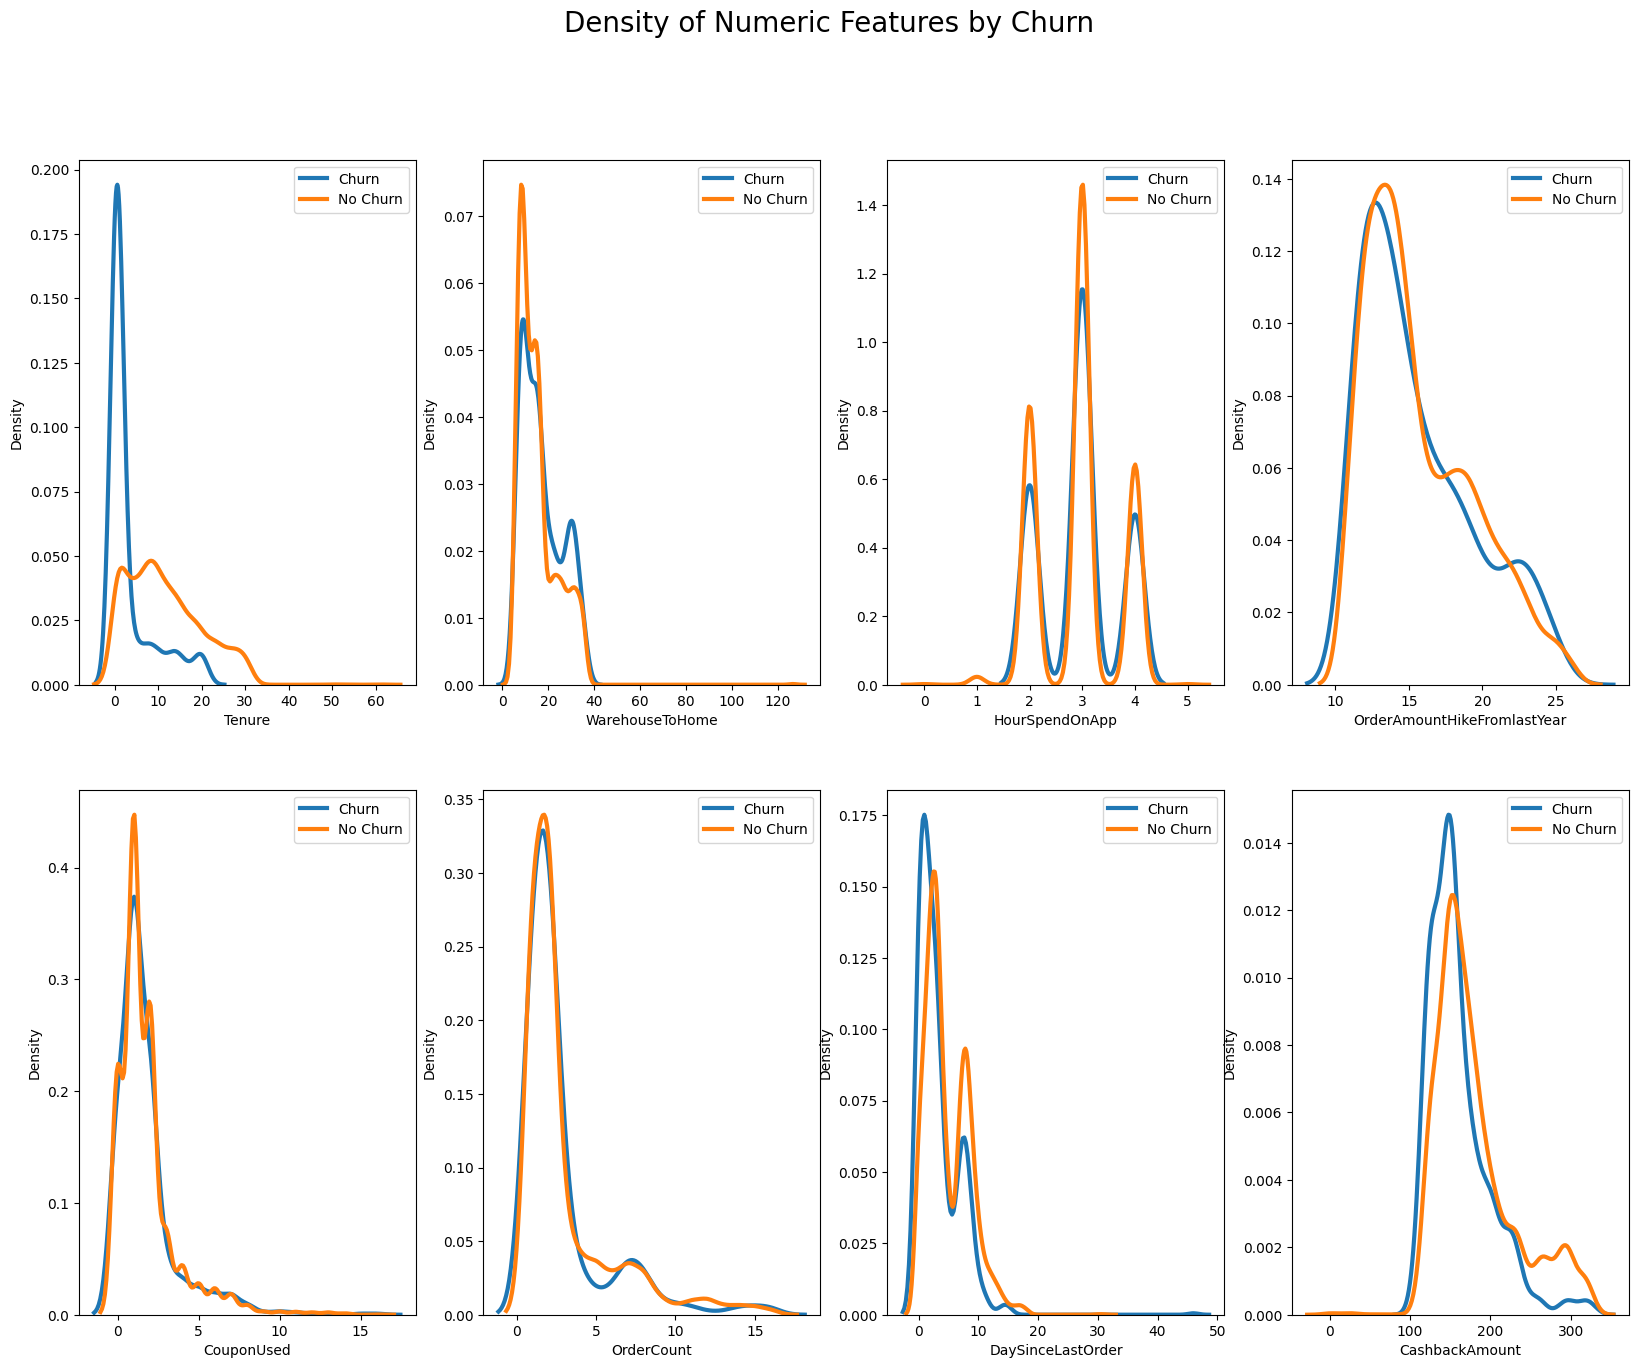

In [23]:
df_c = df[df['Churn']==1].copy()
df_nc = df[df['Churn']==0].copy()

fig, ax = plt.subplots(2,4,figsize=(20, 15))
fig.suptitle('Density of Numeric Features by Churn', fontsize=20)
ax = ax.flatten()

for idx,c in enumerate(num_cols):
    sns.kdeplot(df_c[c], linewidth= 3,
             label = 'Churn',ax=ax[idx])
    sns.kdeplot(df_nc[c], linewidth= 3,
             label = 'No Churn',ax=ax[idx])

    ax[idx].legend(loc='upper right')

plt.show()

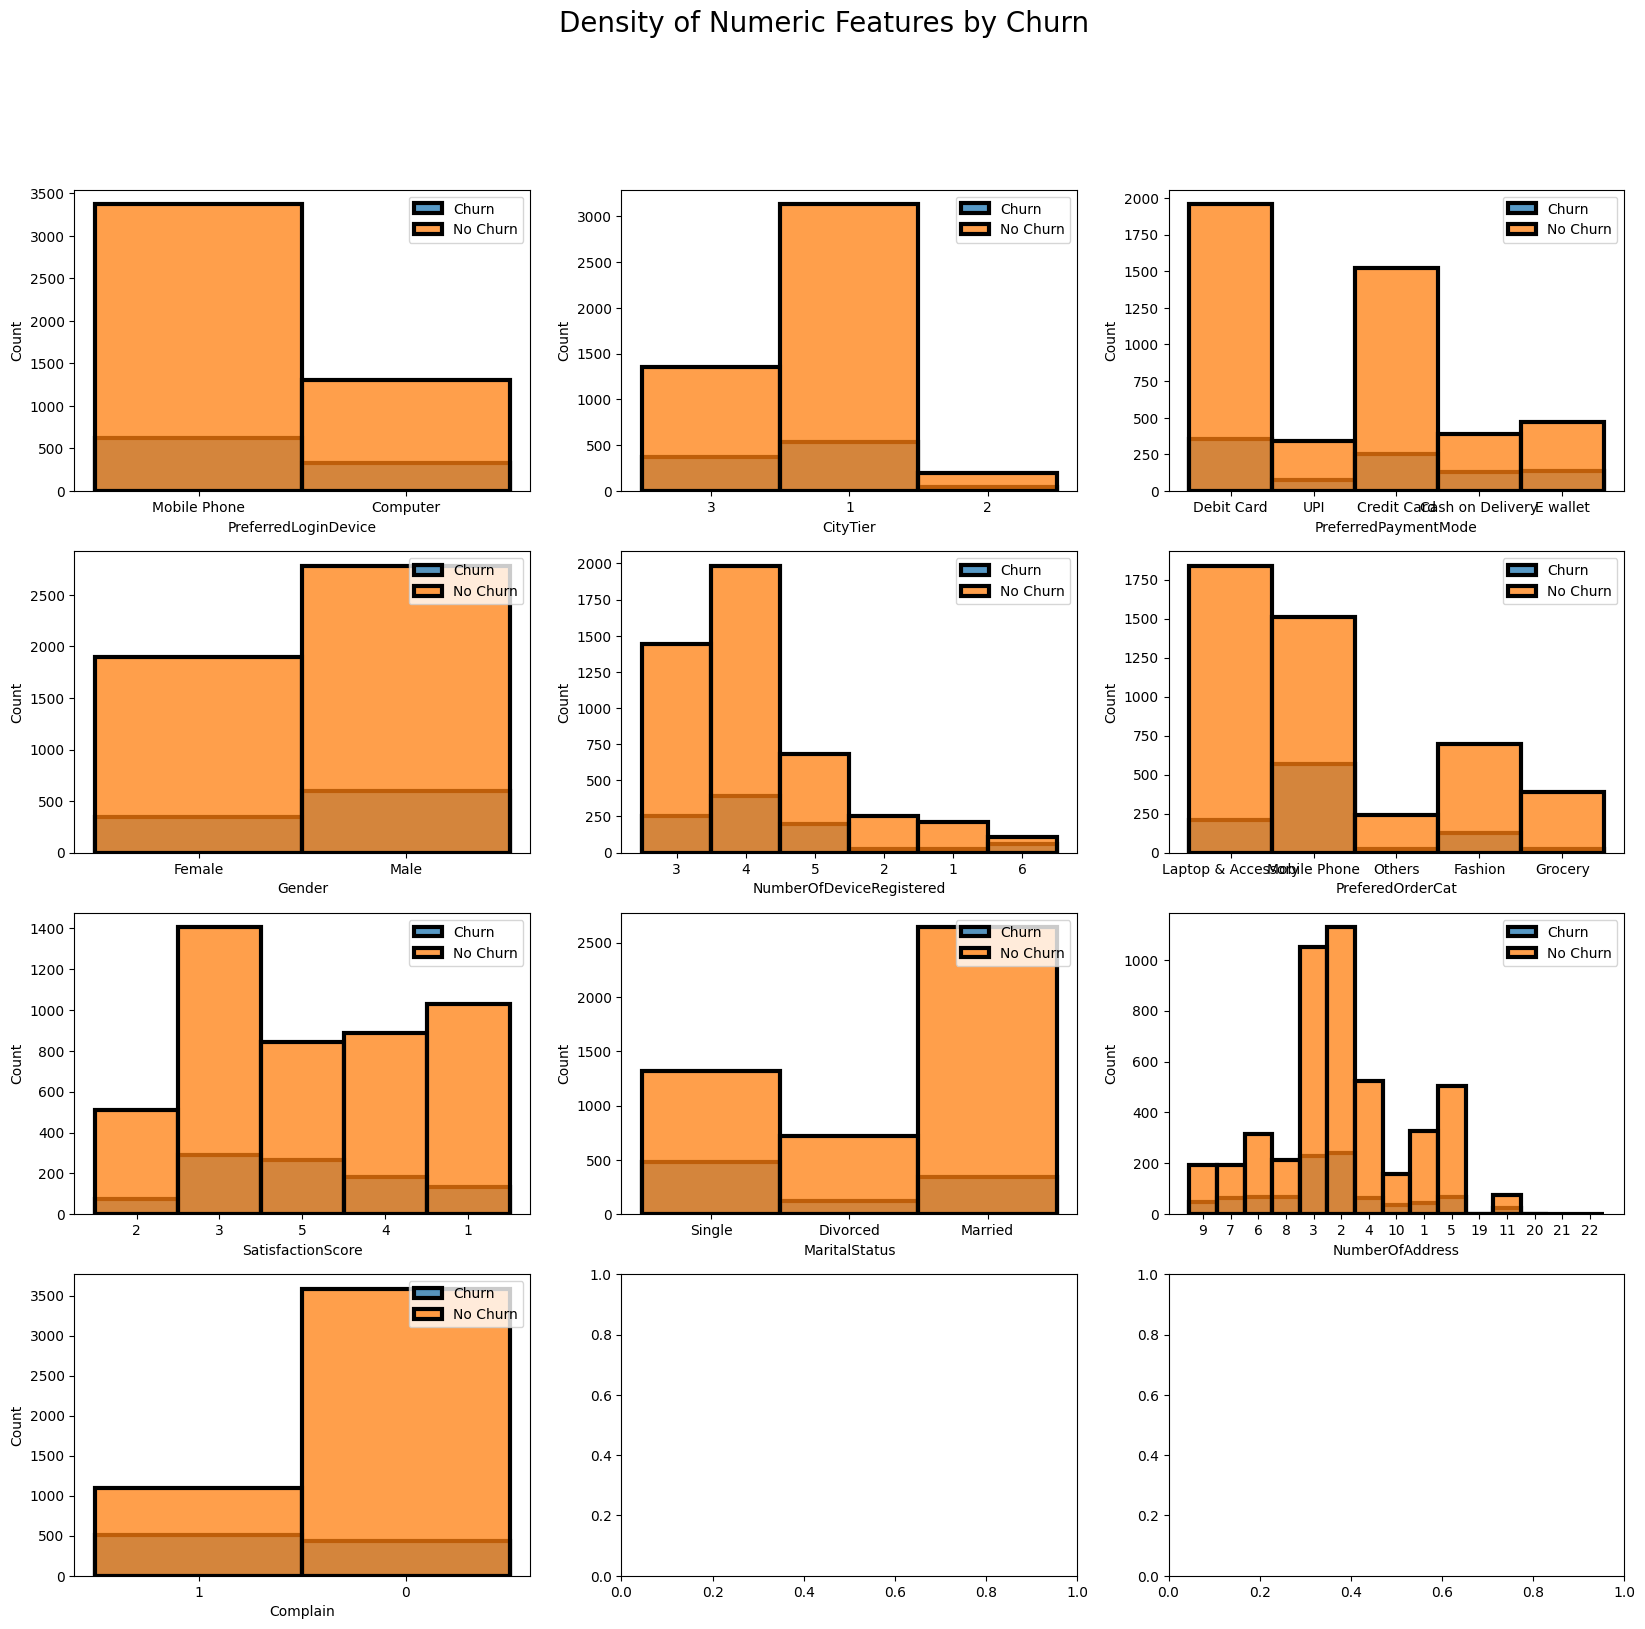

In [24]:
df_c = df2[df2['Churn']=='1'].copy()
df_nc = df2[df2['Churn']=='0'].copy()

fig, ax = plt.subplots(4,3,figsize=(20, 18))
fig.suptitle('Density of Numeric Features by Churn', fontsize=20)
ax = ax.flatten()

for idx,c in enumerate(cat_cols):
    sns.histplot(df_c[c], linewidth= 3,
             label = 'Churn',ax=ax[idx])
    sns.histplot(df_nc[c], linewidth= 3,
             label = 'No Churn',ax=ax[idx])

    ax[idx].legend(loc='upper right')

plt.show()

## Xử lí missing values

<Axes: >

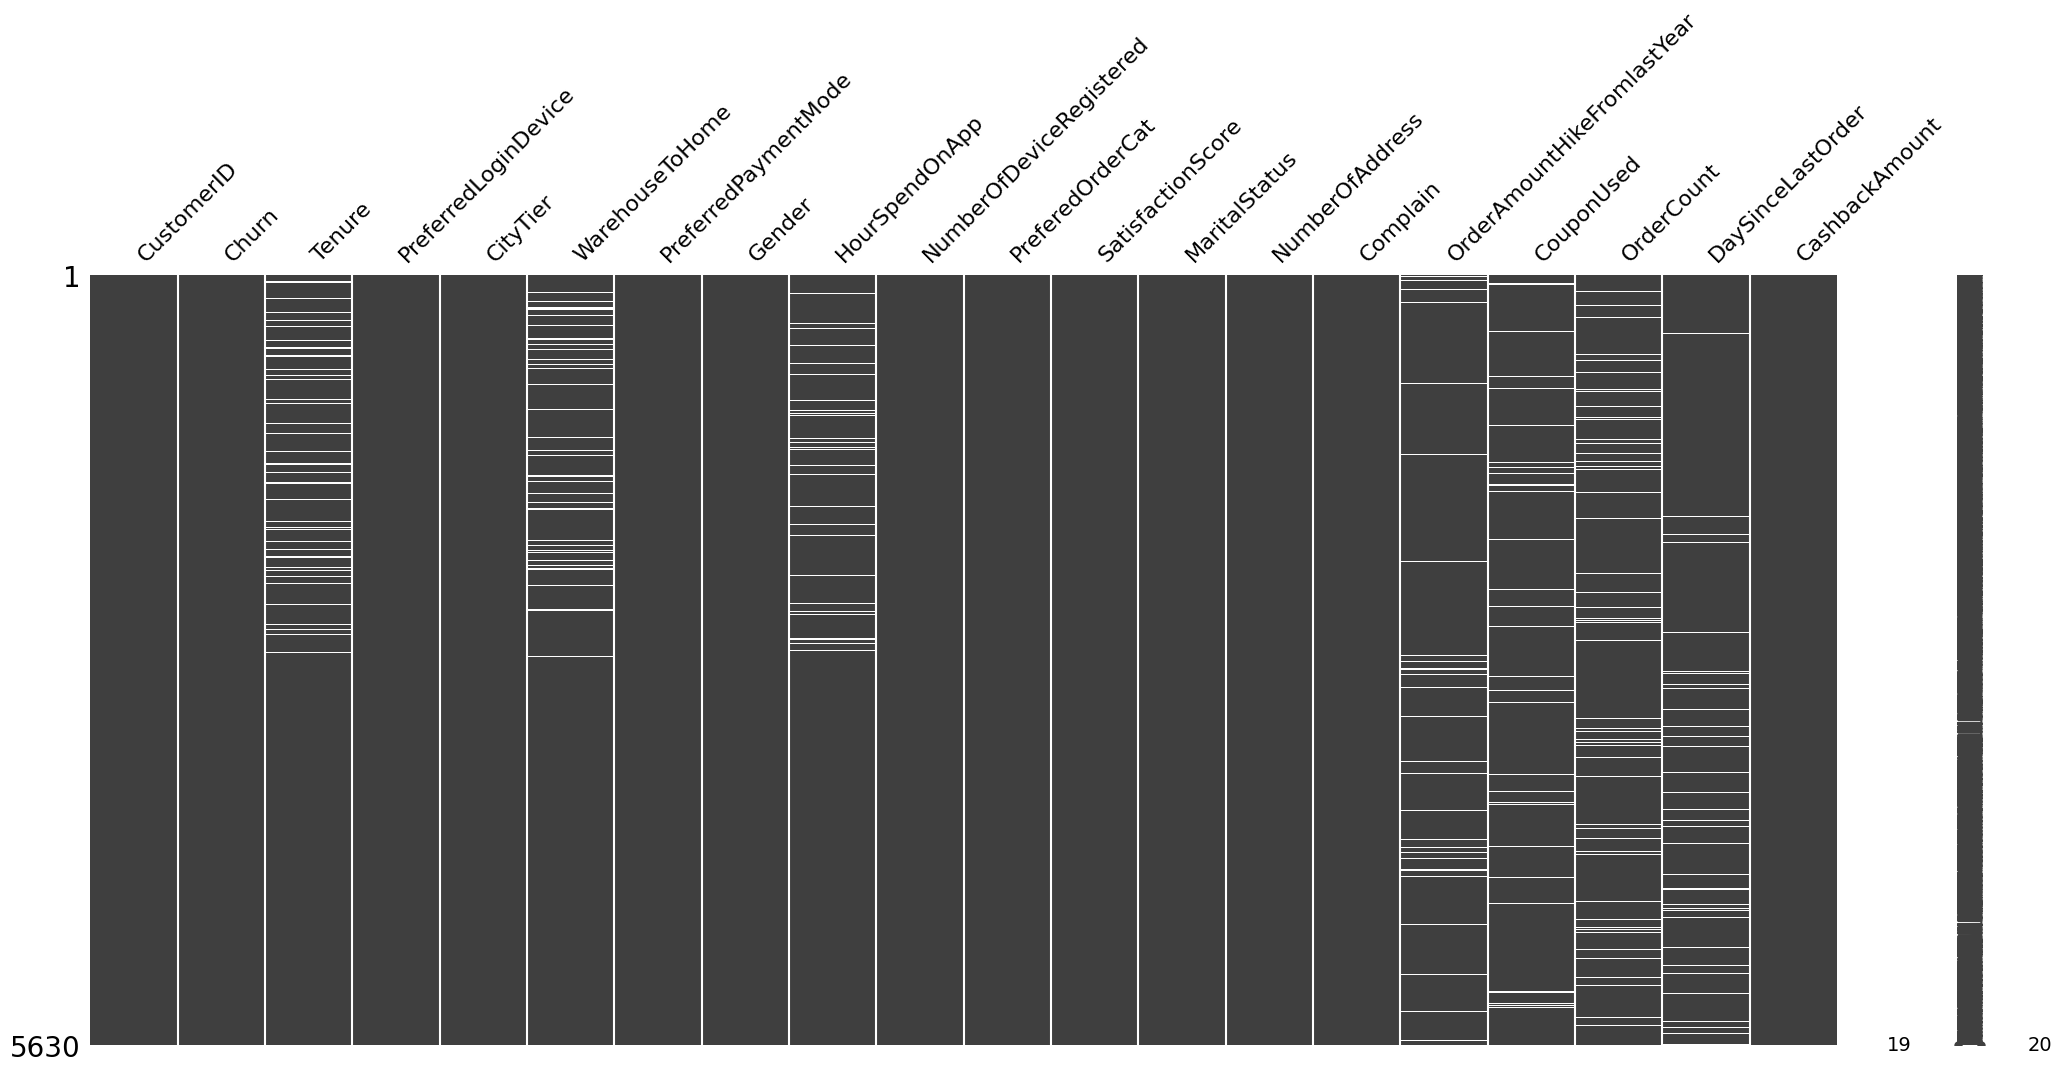

In [25]:
msno.matrix(df)

In [26]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

df['Tenure'] = imputer.fit_transform(df[['Tenure']])
df['WarehouseToHome'] = imputer.fit_transform(df[['WarehouseToHome']]) 
df['HourSpendOnApp'] = imputer.fit_transform(df[['HourSpendOnApp']])
df['OrderAmountHikeFromlastYear'] = imputer.fit_transform(df[['OrderAmountHikeFromlastYear']])
df['CouponUsed'] = imputer.fit_transform(df[['CouponUsed']])
df['OrderCount'] = imputer.fit_transform(df[['OrderCount']])  
df['DaySinceLastOrder'] = imputer.fit_transform(df[['DaySinceLastOrder']])

In [27]:
# After we Checked the data the Customer ID Column not important for our Models so We drop it
df.drop('CustomerID' , axis = 1 , inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5630 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5630 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5630 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

In [28]:
df.shape

(5630, 19)

## Mã hóa các đặc trưng phân loại

In [29]:
# check before encoding that my catogries for my columns are limited
for i in df.columns:
    if df[i].dtype == 'object':
        print(df[i].value_counts())
        print('*' * 40)


PreferredLoginDevice
Mobile Phone    3996
Computer        1634
Name: count, dtype: int64
****************************************
PreferredPaymentMode
Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: count, dtype: int64
****************************************
Gender
Male      3384
Female    2246
Name: count, dtype: int64
****************************************
PreferedOrderCat
Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: count, dtype: int64
****************************************
MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64
****************************************


In [30]:
# cat columns
data = df[df.select_dtypes(exclude=np.number).columns]
data

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single
1,Mobile Phone,UPI,Male,Mobile Phone,Single
2,Mobile Phone,Debit Card,Male,Mobile Phone,Single
3,Mobile Phone,Debit Card,Male,Laptop & Accessory,Single
4,Mobile Phone,Credit Card,Male,Mobile Phone,Single
...,...,...,...,...,...
5625,Computer,Credit Card,Male,Laptop & Accessory,Married
5626,Mobile Phone,Credit Card,Male,Fashion,Married
5627,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
5628,Computer,Credit Card,Male,Laptop & Accessory,Married


In [31]:
le = LabelEncoder()

In [32]:
# Encode for cat_cols
for i in df.columns:
  if df[i].dtype == 'object':
    df[i] = le.fit_transform(df[i])

df.head(4)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,1,3,6.0,2,0,3.0,3,2,2,2,9,1,11.0,1.0,1.0,5.0,159.93
1,1,1.0,1,1,8.0,4,1,3.0,4,3,3,2,7,1,15.0,0.0,1.0,0.0,120.90
2,1,1.0,1,1,30.0,2,1,2.0,4,3,3,2,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,1,3,15.0,2,1,2.0,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134.07


In [33]:
for i in data.columns:
    data[i] = le.fit_transform(data[i])

data.head(4)

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,1,2,0,2,2
1,1,4,1,3,2
2,1,2,1,3,2
3,1,2,1,2,2


In [34]:
df.dtypes

Churn                            int64
Tenure                         float64
PreferredLoginDevice             int64
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode             int64
Gender                           int64
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                 int64
SatisfactionScore                int64
MaritalStatus                    int64
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

## Xử lý giá trị ngoại lai

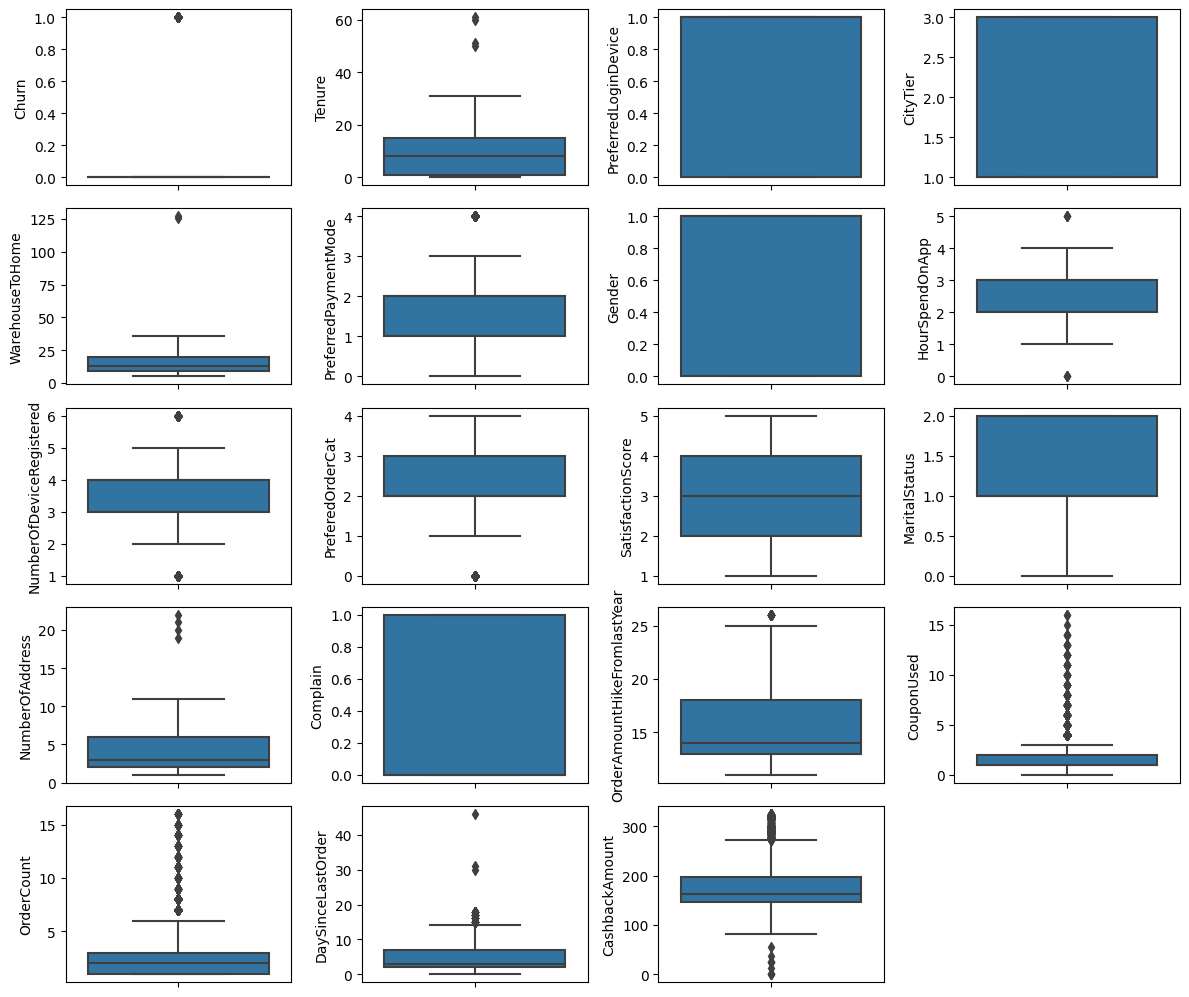

In [35]:
fig = plt.figure(figsize=(12,18))
for i in range(len(df.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df.iloc[:,i])

plt.tight_layout()
plt.show()

In [36]:
# lets detect True Outliers
def handle_outliers(df , column_name):
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1

  # Define Upper and lower boundaries
  Upper = Q3 + IQR * 1.5
  lower = Q1 - IQR * 1.5

  # lets make filter for col values
  new_df = df[ (df[column_name] > lower) & (df[column_name] < Upper) ]

  return new_df

In [37]:
df.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [38]:
# lets Give our Functions columns contains outlier
cols_outliers = ['Tenure' , 'WarehouseToHome' , 'NumberOfAddress' , 'DaySinceLastOrder' , 'HourSpendOnApp' , 'NumberOfDeviceRegistered']

for col in cols_outliers:
    df = handle_outliers(df , col)

df.head(4)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,1,3,6.0,2,0,3.0,3,2,2,2,9,1,11.0,1.0,1.0,5.0,159.93
1,1,1.0,1,1,8.0,4,1,3.0,4,3,3,2,7,1,15.0,0.0,1.0,0.0,120.90
2,1,1.0,1,1,30.0,2,1,2.0,4,3,3,2,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,1,3,15.0,2,1,2.0,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134.07


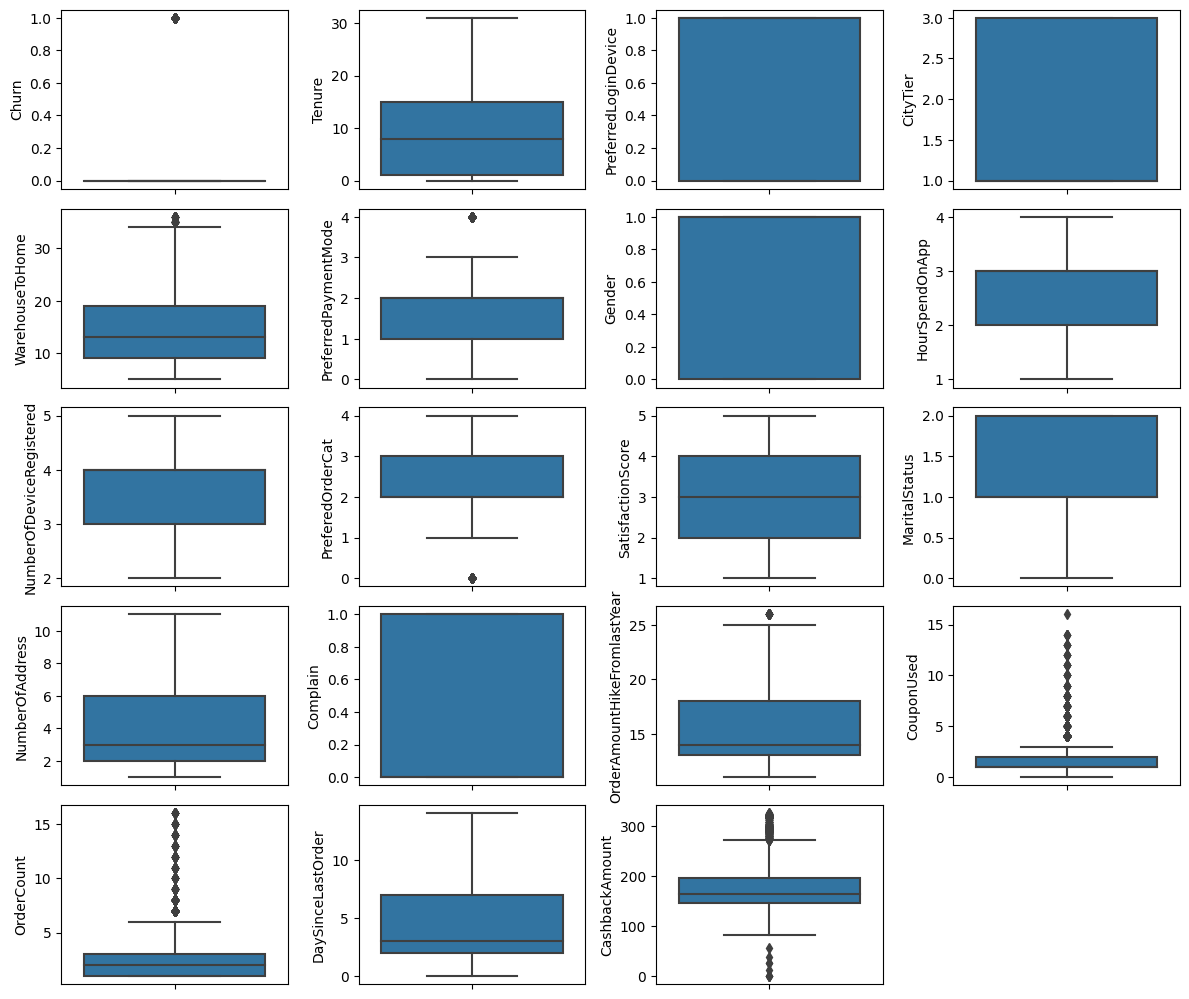

In [39]:
fig = plt.figure(figsize=(12,18))
for i in range(len(df.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df.iloc[:,i])

plt.tight_layout()
plt.show()

In [40]:
corr_matrix = df.corr()
corr_matrix

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
Churn,1.000000,-0.344897,-0.040957,0.069710,0.054803,-0.004939,0.038218,0.001628,0.079158,0.105073,0.108536,0.132019,0.033847,0.252183,-0.001410,-0.010879,-0.031473,-0.170018,-0.164738
Tenure,-0.344897,1.000000,0.036622,-0.053528,-0.007071,-0.002814,-0.058103,0.021265,0.004917,-0.216527,-0.019479,-0.110577,0.266441,-0.021059,-0.014758,0.133969,0.191134,0.198032,0.507220
PreferredLoginDevice,-0.040957,0.036622,1.000000,0.010526,-0.015713,0.010353,-0.012763,0.020561,-0.005138,0.004910,0.037431,-0.020046,0.033814,0.005691,-0.007158,-0.018468,-0.020105,-0.026910,0.043034
CityTier,0.069710,-0.053528,0.010526,1.000000,0.014695,0.251772,-0.022697,-0.010884,0.007364,-0.164116,-0.009822,0.002323,-0.033113,0.006177,-0.023635,0.019766,0.037717,0.011836,0.045271
WarehouseToHome,0.054803,-0.007071,-0.015713,0.014695,1.000000,0.008159,-0.015909,0.082160,0.029087,-0.114390,0.013764,-0.028205,0.001246,0.022032,0.041931,0.016450,0.009916,0.042377,0.036412
PreferredPaymentMode,-0.004939,-0.002814,0.010353,0.251772,0.008159,1.000000,0.019976,-0.007826,0.013166,-0.030990,-0.018161,-0.024029,0.003638,0.028254,-0.000920,-0.009413,-0.035885,-0.015452,0.034968
Gender,0.038218,-0.058103,-0.012763,-0.022697,-0.015909,0.019976,1.000000,-0.013508,-0.021172,0.061103,-0.037507,-0.019951,-0.030499,-0.030809,-0.012532,-0.022730,-0.027854,-0.026917,-0.024238
HourSpendOnApp,0.001628,0.021265,0.020561,-0.010884,0.082160,-0.007826,-0.013508,1.000000,0.274373,0.031743,0.030149,-0.043599,0.137217,-0.002155,0.096905,0.190460,0.105335,0.076904,0.116623
NumberOfDeviceRegistered,0.079158,0.004917,-0.005138,0.007364,0.029087,0.013166,-0.021172,0.274373,1.000000,-0.011672,-0.000990,0.037463,0.071168,-0.001841,0.053853,0.139823,0.090910,0.008722,0.120149
PreferedOrderCat,0.105073,-0.216527,0.004910,-0.164116,-0.114390,-0.030990,0.061103,0.031743,-0.011672,1.000000,-0.002744,0.042391,-0.096516,-0.000466,-0.022508,-0.145770,-0.155691,-0.178142,-0.341057


<Axes: >

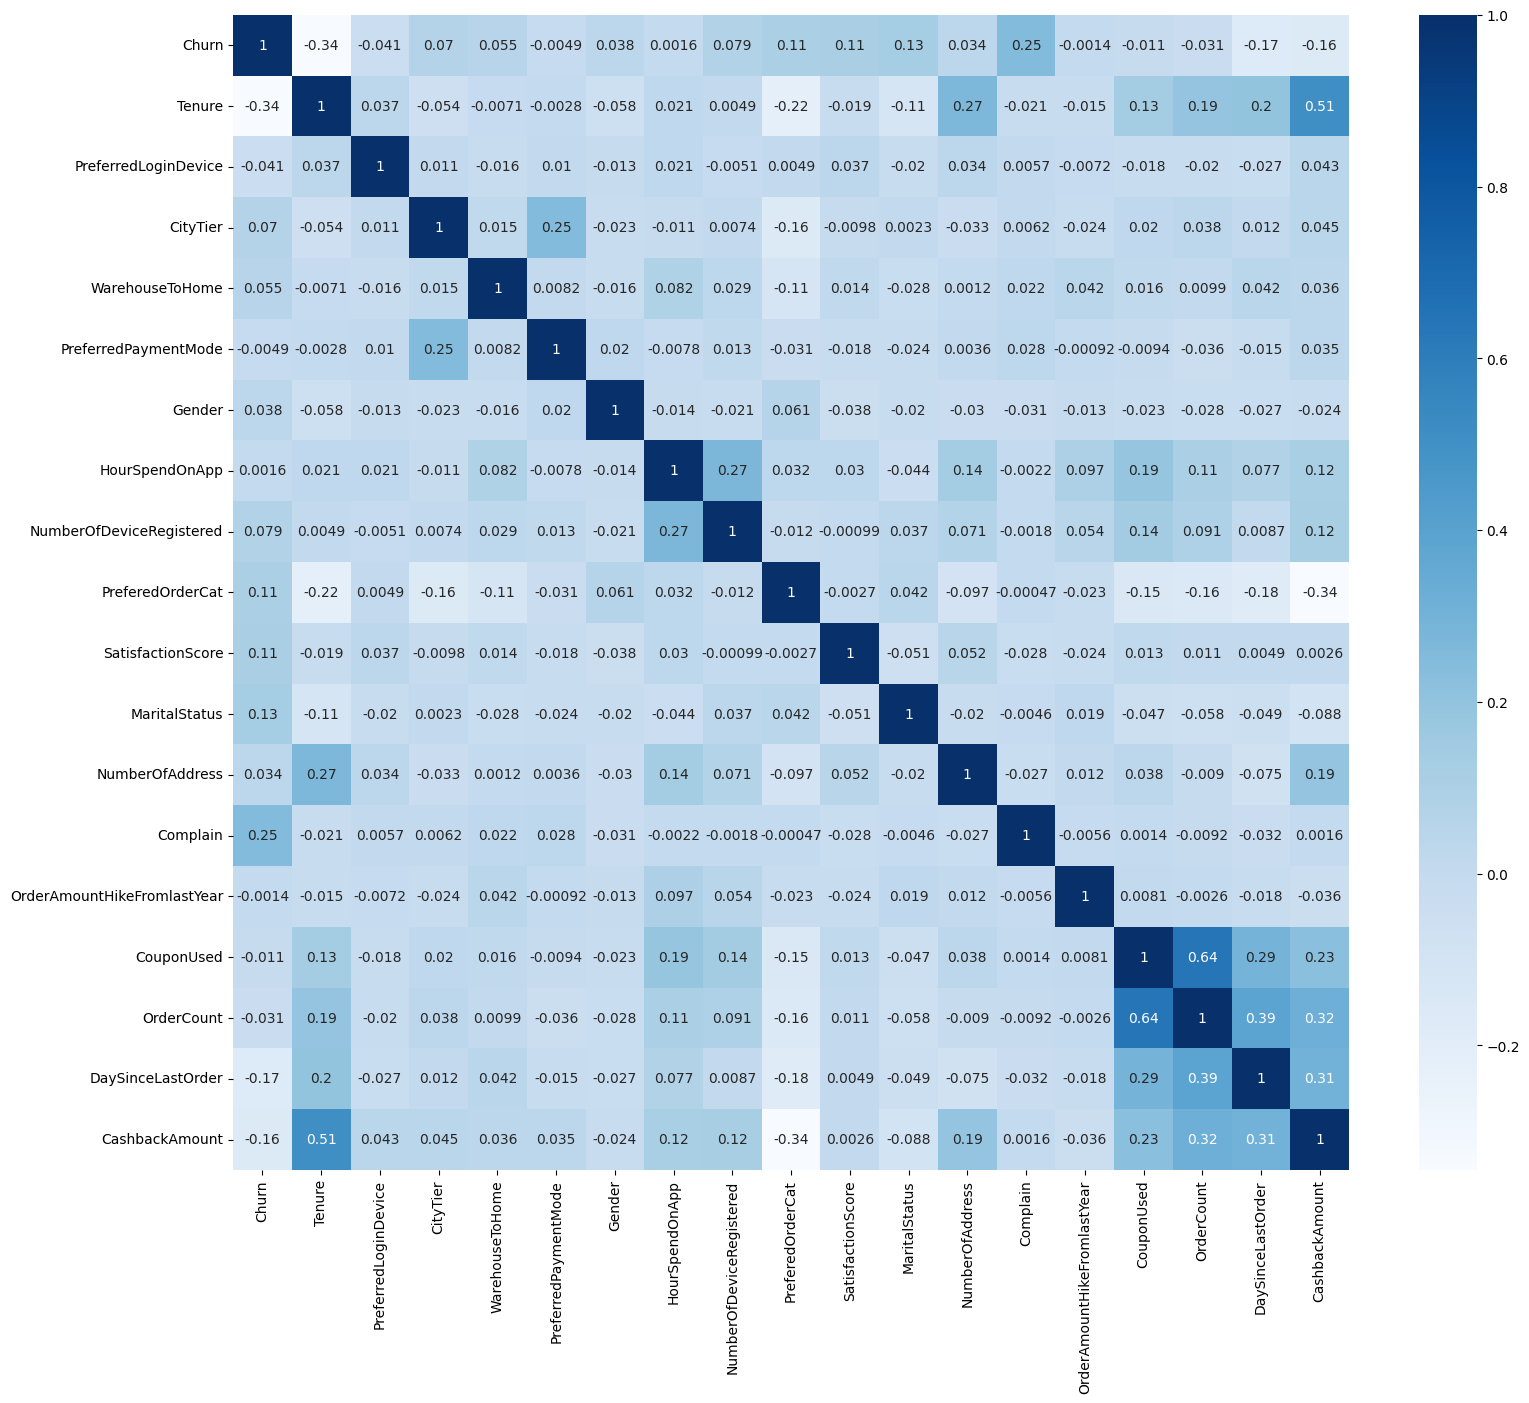

In [41]:
plt.figure(figsize = (18,15))
sns.heatmap(df.corr() , annot = True , cmap = 'Blues')

In [42]:
churn_corr_vector = corr_matrix['Churn'].sort_values(ascending = False)
churn_corr_vector

Churn                          1.000000
Complain                       0.252183
MaritalStatus                  0.132019
SatisfactionScore              0.108536
PreferedOrderCat               0.105073
NumberOfDeviceRegistered       0.079158
CityTier                       0.069710
WarehouseToHome                0.054803
Gender                         0.038218
NumberOfAddress                0.033847
HourSpendOnApp                 0.001628
OrderAmountHikeFromlastYear   -0.001410
PreferredPaymentMode          -0.004939
CouponUsed                    -0.010879
OrderCount                    -0.031473
PreferredLoginDevice          -0.040957
CashbackAmount                -0.164738
DaySinceLastOrder             -0.170018
Tenure                        -0.344897
Name: Churn, dtype: float64

Text(0.5, 1.0, 'Relation Between Features and target')

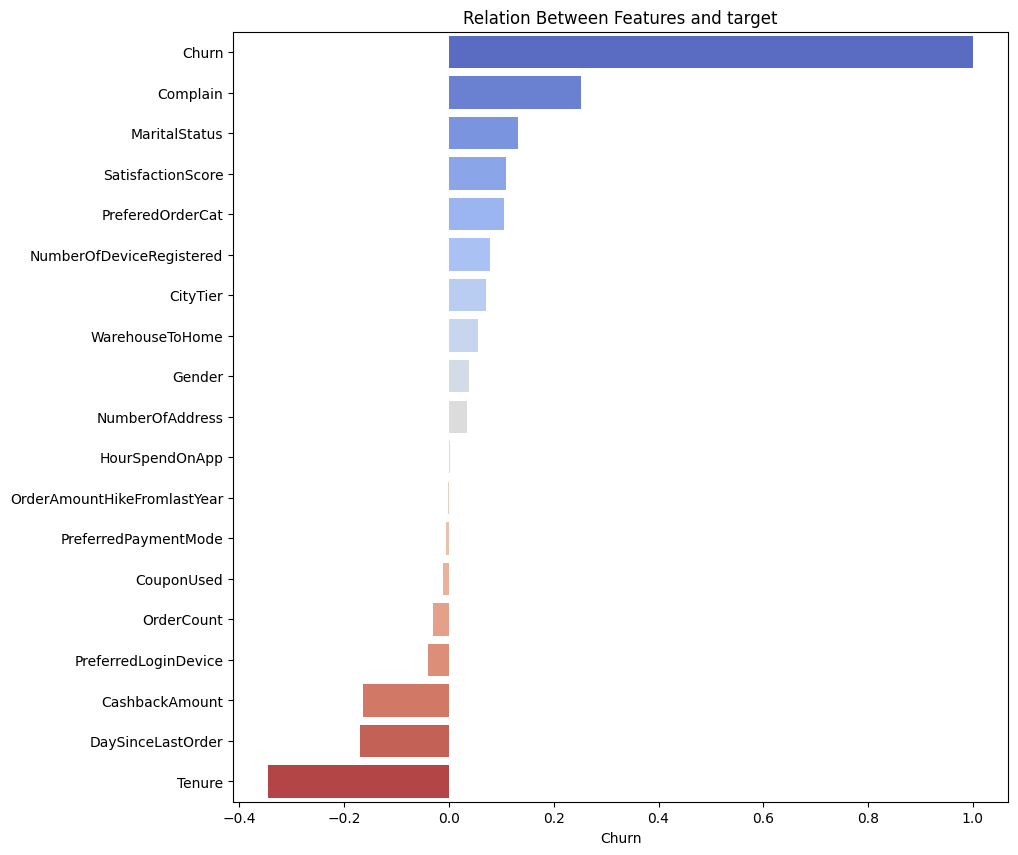

In [43]:
plt.figure(figsize = (10,10))
sns.barplot(x = churn_corr_vector , y = churn_corr_vector.index , palette = 'coolwarm')
plt.title('Relation Between Features and target')

## Xử lý dữ liệu mất cân bằng

In [44]:
fig = px.histogram(df2, x="Churn", color="Churn" ,text_auto= True , title="<b>"+'Check Imbalance' , color_discrete_sequence = ['#BA1F33','#3A506B'])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Churn',
yaxis_title='count',
)
fig.show()

In [45]:
X = df.drop('Churn' , axis = 1)
Y = df['Churn']

In [46]:
from imblearn.combine import SMOTETomek

In [47]:
smt = SMOTETomek(random_state=42)
x_over , y_over = smt.fit_resample(X , Y)

In [48]:
x_over.shape, y_over.shape

((8586, 18), (8586,))

## Chia dữ liệu và chuẩn hóa bằng MinMaxScaler

In [49]:
# x_train , x_test , y_train , y_test = train_test_split(x_over , y_over , test_size = 0.30 , random_state = 42)

In [50]:
# chia thành tập train và test
x_train, x_test, y_train, y_test = train_test_split(x_over , y_over , test_size = 0.3 , random_state = 42)

# chia tiếp tập test thành validation và test mới
x_val, x_test, y_val, y_test = train_test_split(x_test , y_test , test_size = 0.5 , random_state = 42)

In [51]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(6010, 18)
(1288, 18)
(1288, 18)


In [52]:
# Now we  will make normalization for all data to make them in commom range
from sklearn.preprocessing import MinMaxScaler

MN = MinMaxScaler()
x_train_scaled = MN.fit_transform(x_train)
x_val_scaled = MN.transform(x_val)
x_test_scaled = MN.fit_transform(x_test)

<a id="Modeling"></a>
<h1 style='background:#F5F5DC;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center>Modeling</center></h1>

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings

warnings.filterwarnings("ignore")

In [54]:
logisreg_clf = LogisticRegression()
svm_clf = SVC()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
XGB_clf = XGBClassifier()
ada_clf = AdaBoostClassifier()
clf_list = [logisreg_clf, svm_clf, dt_clf, rf_clf, XGB_clf, ada_clf]
clf_name_list = ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'Random Forest', 'XGBClassifier' , 'AdaBoostClassifier']

for clf in clf_list:
    clf.fit(x_train_scaled,y_train)

train_acc_list = []
test_acc_list = []

for clf,name in zip(clf_list,clf_name_list):
    y_pred_train = clf.predict(x_train_scaled)
    y_pred_test = clf.predict(x_test_scaled)
    print(f'Using model: {name}')
    print(f'Trainning Score: {clf.score(x_train_scaled, y_train)}')
    print(f'Test Score: {clf.score(x_test_scaled, y_test)}')
    print(f'Acc Train: {accuracy_score(y_train, y_pred_train)}')
    print(f'Acc Test: {accuracy_score(y_test, y_pred_test)}')
    train_acc_list.append(accuracy_score(y_train, y_pred_train))
    test_acc_list.append(accuracy_score(y_test, y_pred_test))
    print(' ' * 60)
    print('*' * 60)
    print(' ' * 60)

Using model: Logistic Regression
Trainning Score: 0.7795341098169717
Test Score: 0.7989130434782609
Acc Train: 0.7795341098169717
Acc Test: 0.7989130434782609
                                                            
************************************************************
                                                            
Using model: Support Vector Machine
Trainning Score: 0.907820299500832
Test Score: 0.8819875776397516
Acc Train: 0.907820299500832
Acc Test: 0.8819875776397516
                                                            
************************************************************
                                                            
Using model: Decision Tree
Trainning Score: 1.0
Test Score: 0.9122670807453416
Acc Train: 1.0
Acc Test: 0.9122670807453416
                                                            
************************************************************
                                                            
Using mod

In [55]:
# graph to determine best 2 models

all_models = pd.DataFrame({'Train_Accuarcy': train_acc_list , 'Test_Accuarcy' : test_acc_list}  , index = clf_name_list)
all_models

,Train_Accuarcy,Test_Accuarcy
Logistic Regression,0.779534,0.798913
Support Vector Machine,0.907820,0.881988
Decision Tree,1.000000,0.912267
Random Forest,1.000000,0.975155
XGBClassifier,1.000000,0.967391
AdaBoostClassifier,0.874376,0.844720


In [56]:
!pip install mlxtend

<a id="Evaluation"></a>
<h1 style='background:#F5F5DC;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center>Evaluation</center></h1>

In [57]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, RocCurveDisplay

Accuracy = 0.7989130434782609
ROC Area under Curve = 0.798826961794881
              precision    recall  f1-score   support

           0    0.83566   0.74339   0.78683       643
           1    0.76955   0.85426   0.80970       645

    accuracy                        0.79891      1288
   macro avg    0.80261   0.79883   0.79827      1288
weighted avg    0.80256   0.79891   0.79828      1288

**********************************************************************


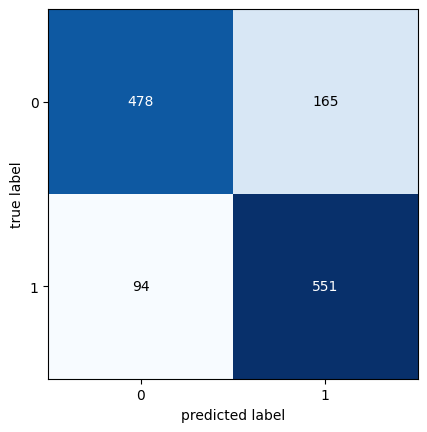

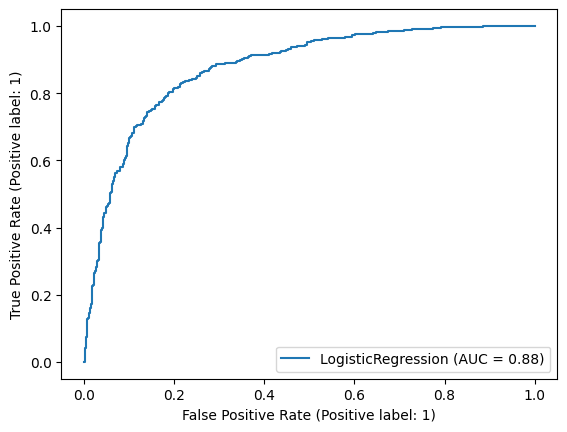

In [58]:
# Logistic regression
model= LogisticRegression()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc1 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc1))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
print('*' * 70)
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

Accuracy = 0.8819875776397516
ROC Area under Curve = 0.8819125465658794
              precision    recall  f1-score   support

           0    0.92255   0.83359   0.87582       643
           1    0.84866   0.93023   0.88757       645

    accuracy                        0.88199      1288
   macro avg    0.88560   0.88191   0.88170      1288
weighted avg    0.88554   0.88199   0.88170      1288



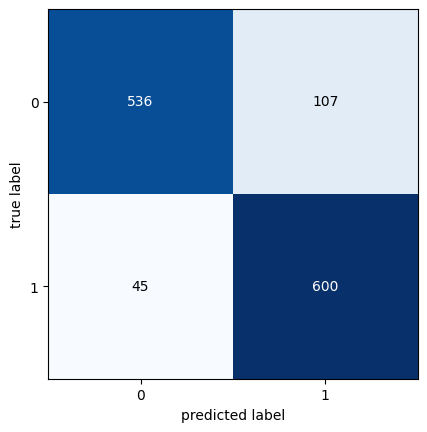

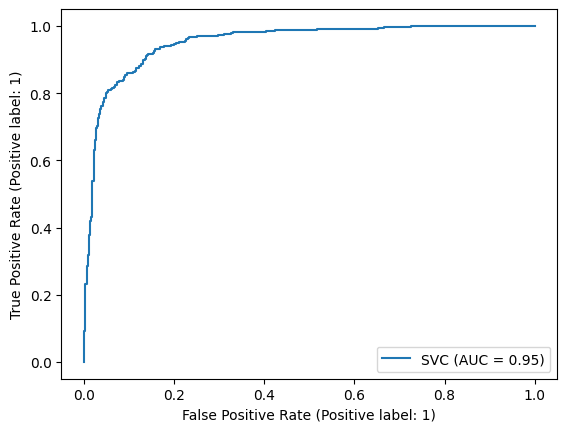

In [59]:
# Support Vector Machine
model=SVC()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc2 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc2))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

Accuracy = 0.9145962732919255
ROC Area under Curve = 0.9145767779425416
              precision    recall  f1-score   support

           0    0.92504   0.90202   0.91339       643
           1    0.90469   0.92713   0.91577       645

    accuracy                        0.91460      1288
   macro avg    0.91486   0.91458   0.91458      1288
weighted avg    0.91485   0.91460   0.91458      1288



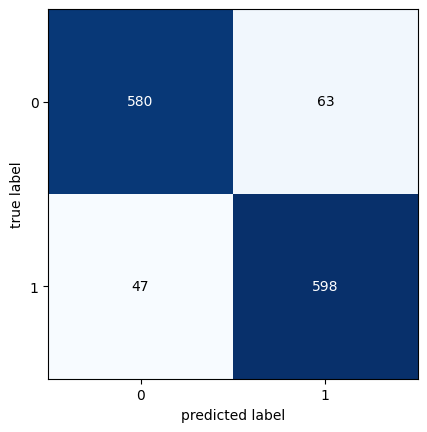

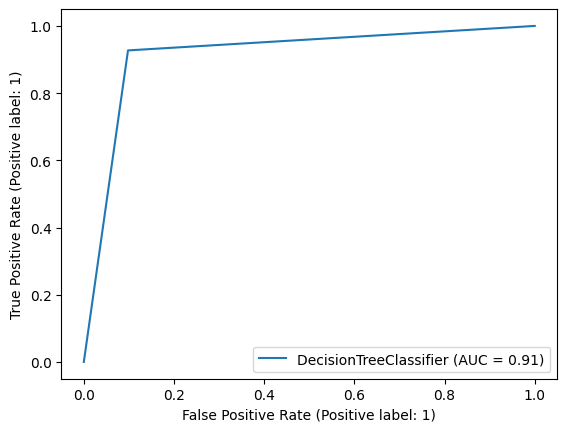

In [60]:
# Decision Tree
model=DecisionTreeClassifier()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc3 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc3))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

Training time: 1.037 seconds
Average prediction time per customer: 0.000024 seconds
Accuracy = 0.9767080745341615
ROC Area under Curve = 0.976676673056289
              precision    recall  f1-score   support

           0    0.99676   0.95645   0.97619       643
           1    0.95827   0.99690   0.97720       645

    accuracy                        0.97671      1288
   macro avg    0.97751   0.97668   0.97670      1288
weighted avg    0.97748   0.97671   0.97670      1288



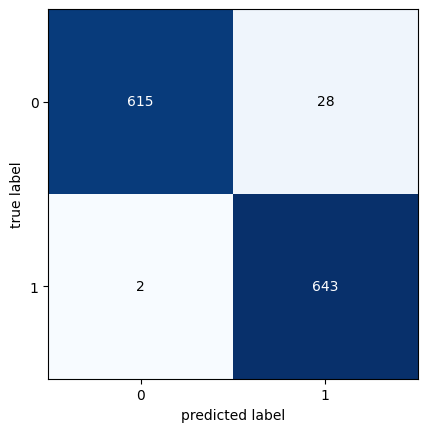

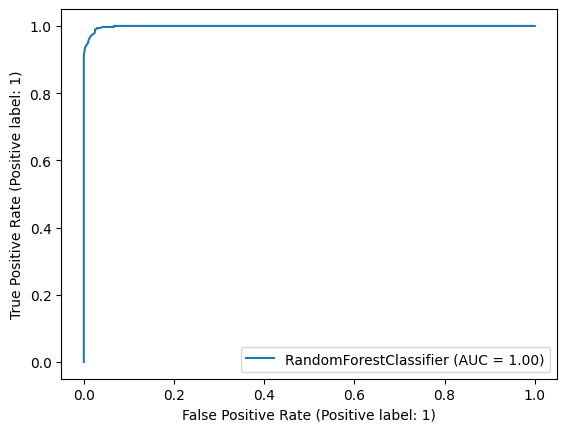

In [61]:
# random forest
start=time.time()

model=RandomForestClassifier()
model.fit(x_train_scaled,y_train)

end=time.time()
training_time=end-start
print(f'Training time: {training_time:.3f} seconds')

pred_start=time.time()
y_pred = model.predict(x_test_scaled)
pred_end = time.time()
pred_time = (pred_end-pred_start)/len(x_test_scaled)
print(f'Average prediction time per customer: {pred_time:.6f} seconds')  
                                   
accuracy = accuracy_score(y_test, y_pred)
roc_auc4 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc4))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

Accuracy = 0.967391304347826
ROC Area under Curve = 0.967347824514449
              precision    recall  f1-score   support

           0    0.99506   0.93935   0.96640       643
           1    0.94273   0.99535   0.96833       645

    accuracy                        0.96739      1288
   macro avg    0.96889   0.96735   0.96736      1288
weighted avg    0.96885   0.96739   0.96736      1288



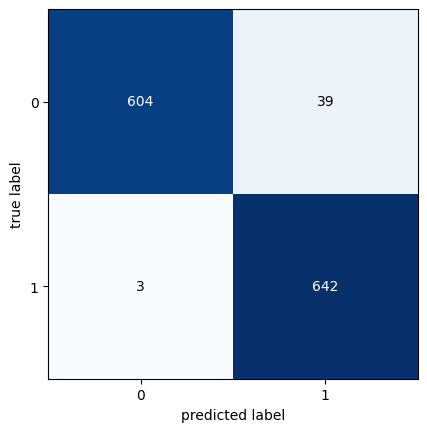

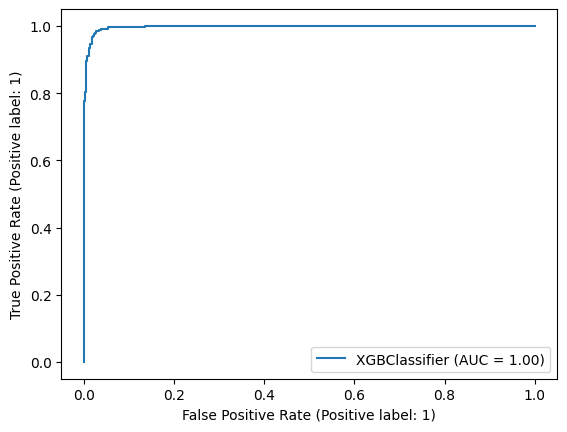

In [62]:
# XGBoost
model=XGBClassifier()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc5 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc5))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

Accuracy = 0.84472049689441
ROC Area under Curve = 0.8446067971114085
              precision    recall  f1-score   support

           0    0.90346   0.77138   0.83221       643
           1    0.80108   0.91783   0.85549       645

    accuracy                        0.84472      1288
   macro avg    0.85227   0.84461   0.84385      1288
weighted avg    0.85219   0.84472   0.84387      1288



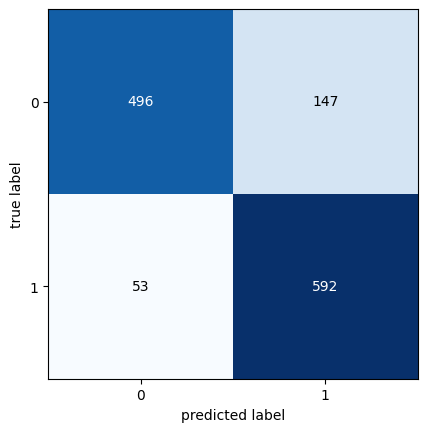

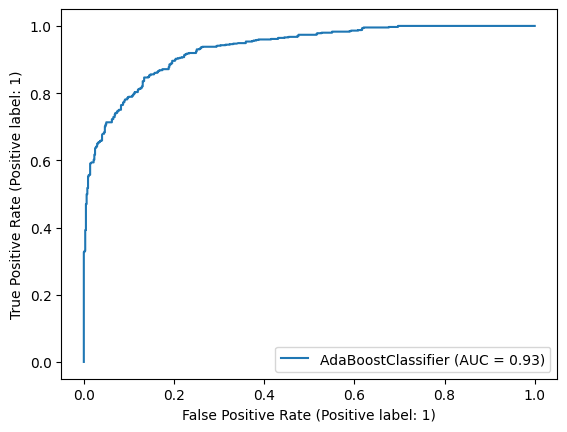

In [63]:
# adaboost
model=AdaBoostClassifier()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc6 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc6))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

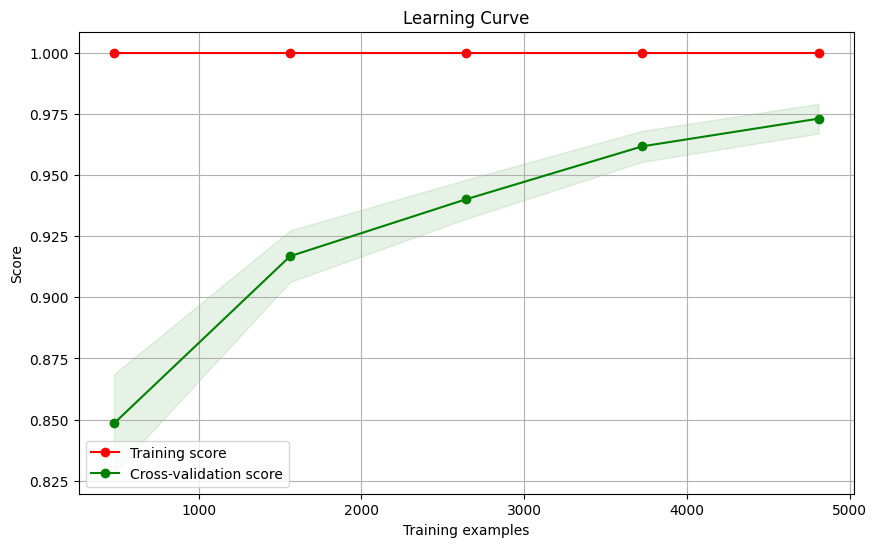

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [64]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
            label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
    return plt

estimator = RandomForestClassifier()
X = x_train 
y = y_train

plot_learning_curve(estimator, "Learning Curve", X, y, cv=5, n_jobs=-1)

In [65]:
end_all=time.time()
full_time=end_all-start_all
print(f'Time of project: {full_time:.3f} seconds')

Time of project: 84.072 seconds


In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Tạo một RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Xác định các giá trị siêu tham số cần thử nghiệm
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Sử dụng GridSearchCV để tìm siêu tham số tốt nhất
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3)
grid_search.fit(x_train_scaled, y_train)

# In ra siêu tham số tốt nhất
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Đánh giá hiệu suất trên tập validation
val_predictions = grid_search.predict(x_val_scaled)
val_accuracy = accuracy_score(y_val, val_predictions)
val_roc_auc = roc_auc_score(y_val, val_predictions)

print("Validation Set Metrics:")
print("Accuracy = {:.5f}".format(val_accuracy))
print("ROC Area under Curve = {:.5f}".format(val_roc_auc))

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Validation Set Metrics:
Accuracy = 0.98214
ROC Area under Curve = 0.98221


In [67]:
# Huấn luyện mô hình với siêu tham số tốt nhất
best_rf_model = RandomForestClassifier(**best_params)
best_rf_model.fit(x_train, y_train)

# Đánh giá hiệu suất trên tập huấn luyện
train_predictions = best_rf_model.predict(x_train)
train_accuracy = accuracy_score(y_train, train_predictions)
train_roc_auc = roc_auc_score(y_train, train_predictions)

print("Training Set Metrics:")
print("Accuracy = {:.5f}".format(train_accuracy))
print("ROC Area under Curve = {:.5f}".format(train_roc_auc))

# Đánh giá hiệu suất trên tập validation
val_predictions = best_rf_model.predict(x_val)
val_accuracy = accuracy_score(y_val, val_predictions)
val_roc_auc = roc_auc_score(y_val, val_predictions)

print("Validation Set Metrics:")
print("Accuracy = {:.5f}".format(val_accuracy))
print("ROC Area under Curve = {:.5f}".format(val_roc_auc))


Training Set Metrics:
Accuracy = 1.00000
ROC Area under Curve = 1.00000
Validation Set Metrics:
Accuracy = 0.98447
ROC Area under Curve = 0.98454


# **ĐỀ XUẤT VÀ KẾT LUẬN**
### Định tính:
* Các đặc trưng ảnh hưởng lớn nhất đến sự rời bỏ dịch vụ thương mại điện tử của khách hàng là “Complain”, “MaterialStatus”, “SatisfactionScore”, “PreferedOrderCat”, “DaySinceLastOrder”, “CashbackAmount” và “Tenure”.
* Mô hình Random Forest được lựa chọn làm mô hình chính do có kết quả đánh giá tổng thể tốt nhất trên các tiêu chí Precision, Recall, F1-score và Accuracy và cũng có thể sử dụng XGBClassifier thay thế vì kết quả đánh giá của mô hình cũng chênh lệch nhau không đáng kể để có thêm cái nhìn tổng quan hơn.
* Tỷ lệ nam giới cao hơn, tăng cường sản phẩm, dịch vụ để thu hút đối tượng nam giới và tiếp tục phát triển theo hướng này.
* Có thể công ty cần xem xét việc chăm sóc sản phẩm phù hợp với khách hàng độc thân và đã kết hôn, vì người độc thân có khả năng rời bỏ cao hơn.
* Công ty nên xem xét những sản phẩm không quá đắt hoặc quá rẻ để những khách hàng thành phố cấp 2 có thể tin tưởng mua nó bởi vì với tư cách là khách hàng tầm trung, họ không đủ khả năng mua những sản phẩm đắt tiền và họ cũng sẽ không tin tưởng mua những sản phẩm giá rẻ vì nó sẽ không đáp ứng được nhu cầu của họ.
* Công ty nên mở rộng thêm một số công nghệ khác ngoài việc chấm điểm sự hài lòng hoặc khiếu nại như là đường dây nóng tiếp nhận khiếu nại để có kết quả nhanh chóng hoặc cung cấp các cuộc gọi điện thoại thường xuyên để nhận phản hồi từ khách hàng.
* Công ty nên kiểm tra phiên bản di động của cửa hàng xem có vấn đề gì với trải nghiệm người dùng không.
* Khi khách hàng đã đạt được số lượng đặt hàng 12%-15%, công ty nên xem xét tập trung hơn vào việc thu hút sự chú ý của họ bằng các sản phẩm họ thích và quan tâm.
* Đối với những khách hàng mới mua hàng điện tử, việc bán chéo có thể được thực hiện bằng cách tặng kèm các phụ kiện điện tử như bàn phím, chuột…


### Định lượng (áp dụng mô hình Random Forest):
* Precision: 0.95685
* Recall: 0.99690
* F1-score: 0.97646
* Accuracy: 0.97593

### Tốc độ huấn luyện và dự đoán:
* Thời gian huấn luyện Random Forest mô hình là khoảng 1.05s.
* Thời gian chạy toàn bộ dự án là khoảng 70s
* Thời gian dự đoán trung bình cho một mẫu (một khách hàng) là 2.10-5s.